## Imports

In [5]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib as mpl
import matplotlib.pyplot as plt
import json

%matplotlib inline

## Custom Methods

In [6]:
def show_the_dag(dag):
    """Show the dag in a vertical layout."""
    write_dot(dag, 'tmp.dot')
    pos = graphviz_layout(dag, prog='dot')
    nx.draw(dag, pos, with_labels=True, arrows=True)
    plt.show()

In [7]:
def show_dag_data(dag):
    """Show the data from the dag in a nice layout."""
    graph_dict = dict(dag.nodes(data=True))
    print(json.dumps(graph_dict, sort_keys=False, indent=2))

## Create a simple dag

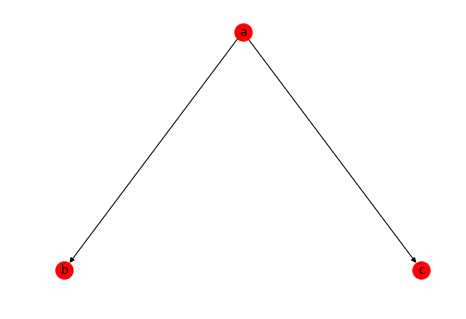

In [8]:
g = nx.DiGraph()
g.add_nodes_from(["a", "b", "c"])
g.add_edges_from([("a", "b"), ("a", "c")])
show_the_dag(g)

In [9]:
# Is this really a dag?
nx.is_directed_acyclic_graph(g)

True

In [10]:
G = nx.DiGraph(day="Friday")
G.graph

{'day': 'Friday'}

## Create a dag with data

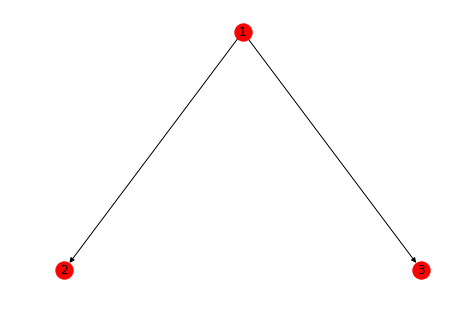

In [11]:
G = nx.DiGraph()
G.add_node(1, time='5pm')
G.add_nodes_from([2, 3], time='2pm')
G.add_edges_from([(1, 2), (1, 3)])
show_the_dag(G)

In [12]:
# For more DAG algos: https://networkx.github.io/documentation/latest/reference/algorithms/dag.html
nx.dag.ancestors(G, 2)

{1}

In [13]:
show_dag_data(G)

{
  "1": {
    "time": "5pm"
  },
  "2": {
    "time": "2pm"
  },
  "3": {
    "time": "2pm"
  }
}


In [14]:
G.node[1]['room'] = 714
show_dag_data(G)

{
  "1": {
    "time": "5pm",
    "room": 714
  },
  "2": {
    "time": "2pm"
  },
  "3": {
    "time": "2pm"
  }
}


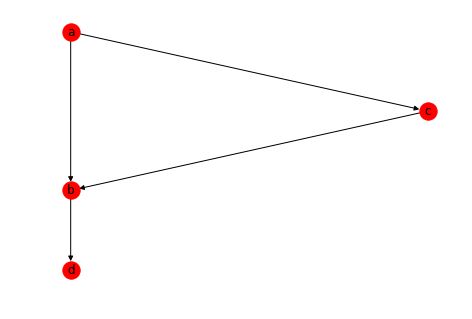

In [15]:
dag_nodes = {
    'a': ['b', 'c'],
    'b': ['d'],
    'c': ['b'],
    'd': []
}

G = nx.DiGraph(dag_nodes)

show_the_dag(G)

/anaconda3/envs/py37/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


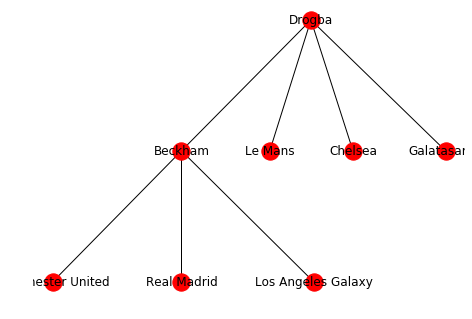

In [16]:
d = {'Drogba': ['Beckham', 'Le Mans', 'Chelsea', 'Galatasaray'], 'Beckham': ['Manchester United', 'Real Madrid', 'Los Angeles Galaxy']}
g = nx.Graph(d)
show_the_dag(g)